<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  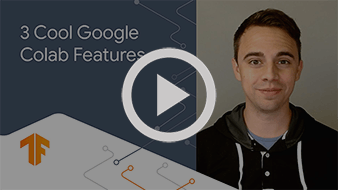
  </a>
</center>

<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


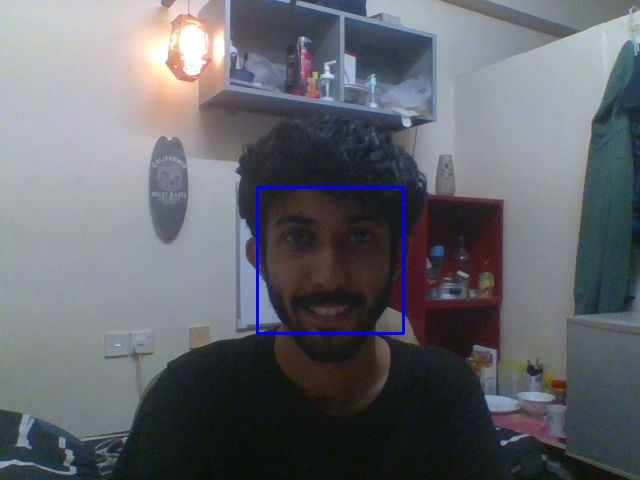

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

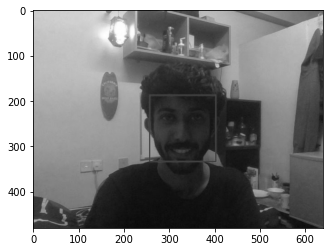

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('photo.jpg')
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Displaying the converted image
color_coverted = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB)
# pil_img = Image.fromarray(color_coverted)
# pil_img.show()

plt.imshow(color_coverted)
plt.show()

In [ ]:
print(cv2.__version__)

4.6.0


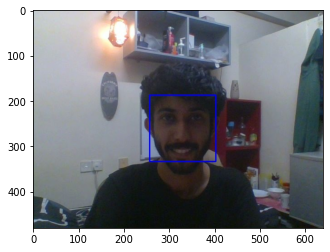

In [ ]:
# Open image using openCV2
img = cv2.imread("photo.jpg")
  
# Notice the COLOR_BGR2RGB which means that the color is
# converted from BGR to RGB
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# using pillow
# pil_image = Image.fromarray(color_coverted)
# pil_image.show()

# using matplotlib
# plt.figure(figsize=(10,10))
plt.imshow(color_coverted)
plt.show()

In [ ]:
#Otsu thresholding
# ret, blackAndWhiteImage = cv2.threshold(grayImage,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)


In [ ]:
kernel = np.ones((3,3), np.float32)/30 # box filter

In [ ]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

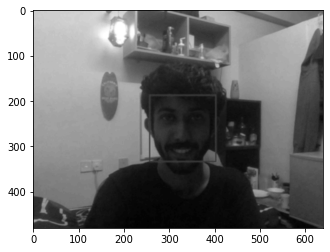

In [ ]:
img = cv2.imread("photo.jpg")
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
convolvedImg = cv2.filter2D(grayImage, -1,kernel)

# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()

displayImage(convolvedImg)

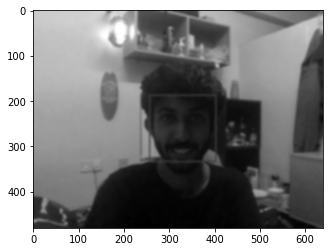

In [ ]:
imgBlur = cv2.GaussianBlur(grayImage,(7,7),5)
# median = cv2.medianBlur(img,5)
# blur = cv2.bilateralFilter(img,9,75,75)

# Displaying the converted image
# pil_img = Image.fromarray(imgBlur)
# pil_img.show()

displayImage(imgBlur)

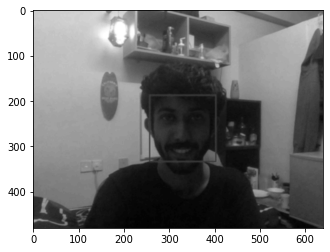

In [ ]:
convolvedImg = cv2.filter2D(grayImage, -1,kernel)
# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()
displayImage(convolvedImg)

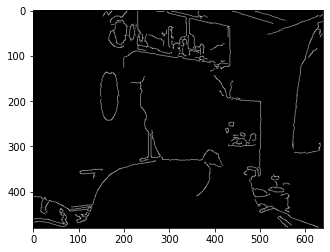

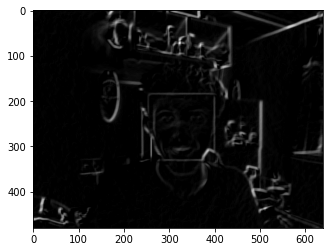

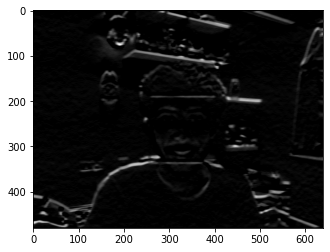

In [ ]:
# canny
imgCanny = cv2.Canny(imgBlur,20,70)

# sobel
sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely

# Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,-1]])
img_prewittx = cv2.filter2D(imgBlur,-1,kernelx)
img_prewitty = cv2.filter2D(imgBlur,-1,kernely)
imgPrewitt = img_prewittx + img_prewitty

# # Displaying the converted image
# pil_img = Image.fromarray(imgCanny)
# pil_img.show()

# pil_img = Image.fromarray(imgSobel)
# pil_img.show()

# pil_img = Image.fromarray(imgPrewitt)
# pil_img.show()

displayImage(imgCanny)
displayImage(imgSobel)
displayImage(imgPrewitt)

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo1.jpg


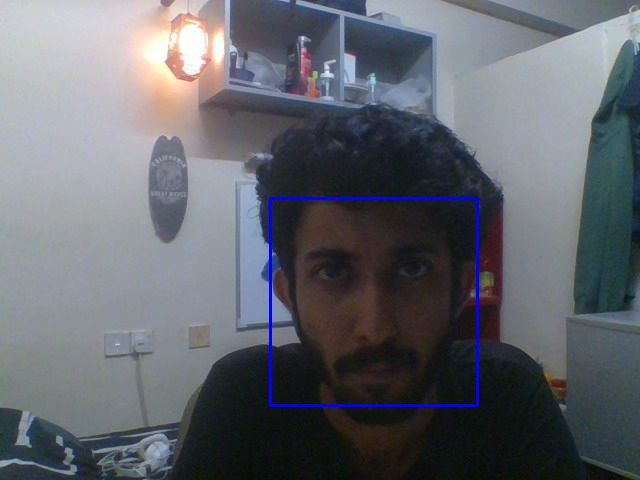

In [ ]:
try:
  filename = take_photo('photo1.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

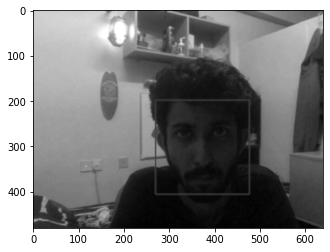

In [ ]:
img = cv2.imread("photo1.jpg")
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
convolvedImg = cv2.filter2D(grayImage, -1,kernel)

# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()

displayImage(convolvedImg)

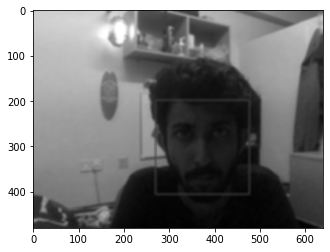

In [ ]:
imgBlur = cv2.GaussianBlur(grayImage,(7,7),5)
# median = cv2.medianBlur(img,5)
# blur = cv2.bilateralFilter(img,9,75,75)

# Displaying the converted image
# pil_img = Image.fromarray(imgBlur)
# pil_img.show()

displayImage(imgBlur)

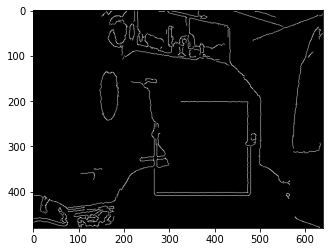

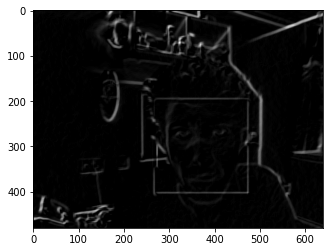

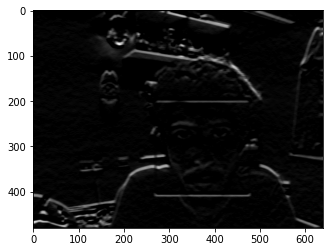

In [ ]:
# canny
imgCanny = cv2.Canny(imgBlur,20,70)

# sobel
sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely

# Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,-1]])
img_prewittx = cv2.filter2D(imgBlur,-1,kernelx)
img_prewitty = cv2.filter2D(imgBlur,-1,kernely)
imgPrewitt = img_prewittx + img_prewitty

# # Displaying the converted image
# pil_img = Image.fromarray(imgCanny)
# pil_img.show()

# pil_img = Image.fromarray(imgSobel)
# pil_img.show()

# pil_img = Image.fromarray(imgPrewitt)
# pil_img.show()

displayImage(imgCanny)
displayImage(imgSobel)
displayImage(imgPrewitt)

In [ ]:
def take_photo(filename='photo2.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo2.jpg


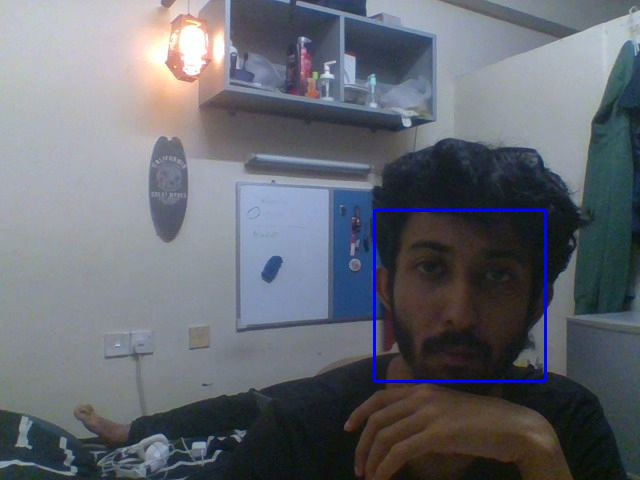

In [ ]:
try:
  filename = take_photo('photo2.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

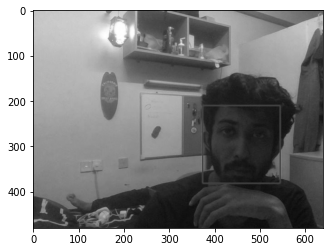

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('photo2.jpg')
grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

# Displaying the converted image
color_coverted = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB)
# pil_img = Image.fromarray(color_coverted)
# pil_img.show()

plt.imshow(color_coverted)
plt.show()

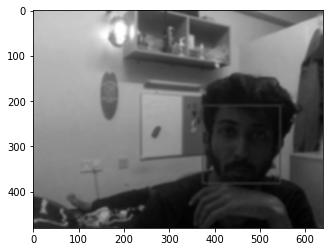

In [ ]:
imgBlur = cv2.GaussianBlur(grayImage,(7,7),5)
# median = cv2.medianBlur(img,5)
# blur = cv2.bilateralFilter(img,9,75,75)

# Displaying the converted image
# pil_img = Image.fromarray(imgBlur)
# pil_img.show()

displayImage(imgBlur)

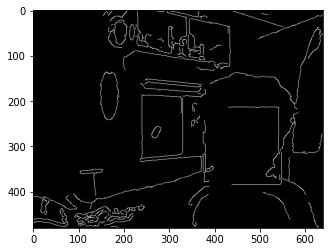

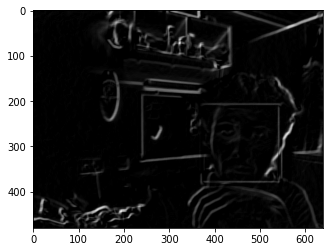

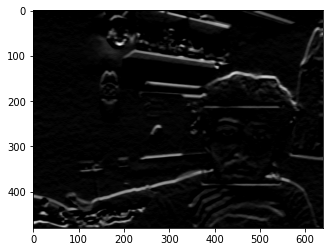

In [ ]:
# canny
imgCanny = cv2.Canny(imgBlur,20,70)

# sobel
sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely

# Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,-1]])
img_prewittx = cv2.filter2D(imgBlur,-1,kernelx)
img_prewitty = cv2.filter2D(imgBlur,-1,kernely)
imgPrewitt = img_prewittx + img_prewitty

# # Displaying the converted image
# pil_img = Image.fromarray(imgCanny)
# pil_img.show()

# pil_img = Image.fromarray(imgSobel)
# pil_img.show()

# pil_img = Image.fromarray(imgPrewitt)
# pil_img.show()

displayImage(imgCanny)
displayImage(imgSobel)
displayImage(imgPrewitt)

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

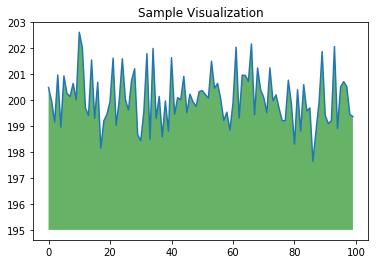

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
